# Équations différentielles temporelles


Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_equa_diff.ipynb"> ça se passe ici<a>


        
## Équation différentielle ordinaire

Prenons l'exemple de l'évolution en température d'une pièce mécanique mince de surface $S$ trempée dans un fluide à $T_f$ avec un coefficient d'échange $h$. L'équation différentielle d'évolution de la température vaut :
    $
    \begin{equation}
        m C_p \frac{dT}{dt} = h S (T - T_f)
    \end{equation}
    $

La température initiale est de 300°C.

Text(0, 0.5, 'Température (°C)')

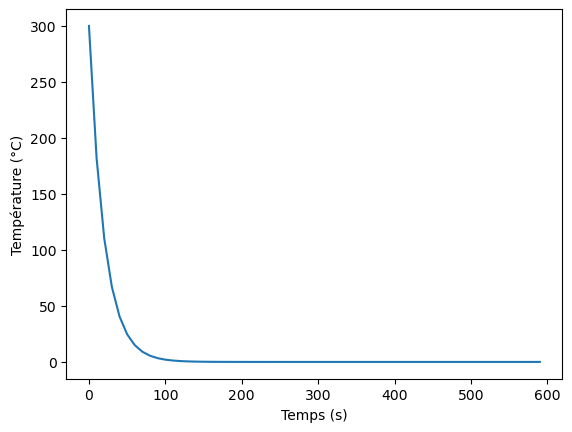

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def equationT(T,t):
    mCp=1*1000
    hS=100*0.5
    Tf=0
    dTdt = hS/mCp*(Tf-T)
    return dTdt

# values of time
t = np.arange(0,600,10)
T0=300
# solving ODE
Tp = odeint(equationT, T0, t)

plt.plot(t, Tp)
plt.xlabel('Temps (s)')
plt.ylabel('Température (°C)')


<span style="color:green"> *À vous de jouer : résolvez l'évolution de la température dans une salle telle que $\rho V C_p \frac{dT}{dt}= \rho Q_v C_p(T_e - T) + P$ avec $P=10~000$ [W], $T_e=-10$°C et $Q_v=1000$ [m$^3$/h] (on convertira en SI et on fera les hypothèses pour le volume de la pièce).* </span>

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# un coup de main pour démarrer...
def equationT(T,t):
    mCp=1.2*1006*5*4*3*
    rho=1.2
    T_e=-10
    P=10000 # W
    dTdt = rhoQvCp/rhoVCp*(Te-T) + P/mCp
    return dTdt


essai degré  1
essai degré  2
essai degré  3
essai degré  4
essai degré  5
essai degré  6
essai degré  7


<span style="color:green"> *Bonus : Intégrer une variation de la température extérieure $T_e$ selon une sinusoïde $T_e(t) = -10 + 5 \times \sin(\frac{2 \pi t}{ 3600 \times 24})$.* </span>

## Système d'équations différentielles

Il est possible de résoudre des équations couplées, comme le modèle "proie/prédateur" (un rappel <a href="https://fr.wikipedia.org/wiki/%C3%89quations_de_pr%C3%A9dation_de_Lotka-Volterra"> sur ouikipedia<a>).  Supposons qu'on souhaite connaître l'évolution de la population de lynx $X$ et de lapins $L$ suivant l'évolution définie par :
    
$
    \begin{eqnarray}
         \frac{dL}{dt} = L (\alpha - \beta X) \\
         \frac{dX}{dt} = X (\delta L - \gamma)
    \end{eqnarray}
$
    
Où $\alpha$ est le taux de reproduction des lapins, $\beta$ la mortalité liée à la prédation par les lynx, $\delta$ le taux de reproduction des lynx - qui dépend de la disponibilité en proies - et $\gamma$ leur mortalité.

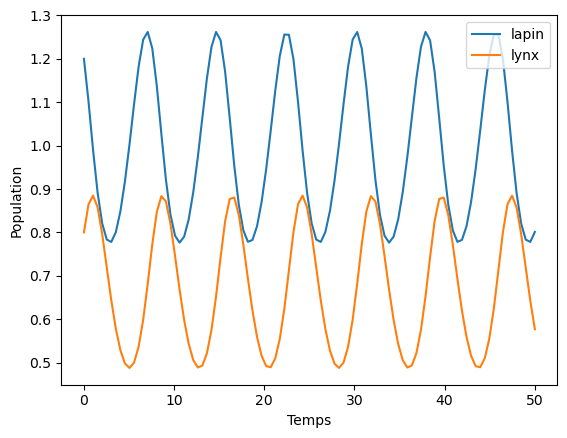

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def systeme_eqdiff(sysdiff,t):
    Lapin,Lynx= sysdiff[0],sysdiff[1]
    alpha=2/3 # taux reproduction lapin
    beta=3/3  # taux mortalité lapin en fc lynx
    gamma=1  # taux mortalite lynx
    delta=1 # taux reproduction predateurs fc proies
    dLapindt = Lapin*(alpha - beta*Lynx)
    dLynxdt =  Lynx *(delta*Lapin - gamma)
    return [dLapindt , dLynxdt]

# initial condition
Lapin0 = 1.2
Lynx0 = 0.8
cond_init=[Lapin0,Lynx0]
# values of time
t = np.linspace(0,50,100)

# solving ODE
vecCL = odeint(systeme_eqdiff, cond_init, t)
C= vecCL[:,0]
L= vecCL[:,1]
# plot results
# plt.ylim(0,3)
plt.plot(t,C, label='lapin')
plt.plot(t,L, label='lynx')
plt.xlabel("Temps")
plt.ylabel("Population")
plt.legend()

<span style="color:green"> *À vous de jouer : on intègre les équations de modélisation du COVID.* </span>

On souhaite connaître le taux d'individus sains $S$, infectés $I$ et rétablis $R$ dans une population en fonction du taux de contact $\beta$ et de la durée du stade infectant $\tau$ :

$
    \begin{eqnarray}
         \frac{dS}{dt} &=& - \beta S \times I \\
         \frac{dI}{dt} &=& \beta S \times I \\
         \frac{dR}{dt} &=& \frac{I}{\tau}
    \end{eqnarray}
$

In [ ]:
# on se base sur le modèle décrit ici :
# https://www.academie-sciences.fr/pdf/rapport/2020_06_17_modeles_Expert.pdf

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# a vous Houston...
def systeme_eqdiff(sysdiff,t):
    S,I,R= sysdiff[0],sysdiff[1],sysdiff[2]
    #...
    return [dSdt , dIdt, dRdt]
